In [3]:
# Import the libraries that will be used for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Import the libraries that will be used for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [4]:

df = pd.read_csv(r"C:\Users\hemal\OneDrive - Tesign Inc\Hema\Data science\Portfolio\RFM_Analysis\RFM-Customer-Segmentation-Analysis\OnlineRetail.csv", 
                 encoding= 'unicode_escape')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


# Data Preparation

In [5]:
def summary (df):
    types= df.dtypes
    counts = df.apply(lambda x: x.count())
    unique_value_count = df.apply(lambda x: x.unique().shape[0])
    nulls = df.apply(lambda x: x.isnull().sum())
    print ("Data shape:", df.shape)
    
    cols =['types','count','unique_count','null_count']
    str = pd.concat([types,counts,unique_value_count, nulls], axis=1, sort = True)
    str.columns = cols
    return str

details = summary(df)
details

Data shape: (541909, 8)


,types,count,unique_count,null_count
Country,object,541909,38,0
CustomerID,float64,406829,4373,135080
Description,object,540455,4224,1454
InvoiceDate,object,541909,23260,0
InvoiceNo,object,541909,25900,0
Quantity,int64,541909,722,0
StockCode,object,541909,4070,0
UnitPrice,float64,541909,1630,0


In [6]:
df.Country.value_counts(normalize = True) 

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [6]:
# Choosing Germany for analysis

df= df[df.Country == 'Germany'] 

In [7]:
df.shape

(9495, 8)

Checking the number of unique customer id's out of the 9495 rows , this will help in the clustering process. If the customer
ids are unique , each customer will be like a cluster and the clustering algorithm will not be able to find patterns 
significantly m

In [8]:
# returns the number of unique customerid counts
df['CustomerID'].nunique() 

95

In [10]:
# checking if there are any null values in the columns
df.isnull().sum()

# we can see that there are no null values 

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
# checking if there are any negative values in unitprice and quantity

(df['UnitPrice'] < 0) .any()

False

In [12]:
(df['Quantity'] < 0) .any()

True

In [13]:
(df['Quantity'] < 0) .sum()

453

In [14]:
df.loc[(df['Quantity'] <0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1973,C536548,22244,3 HOOK HANGER MAGIC GARDEN,-4,12/1/2010 14:33,1.95,12472.0,Germany
1974,C536548,22242,5 HOOK HANGER MAGIC TOADSTOOL,-5,12/1/2010 14:33,1.65,12472.0,Germany
1975,C536548,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,-1,12/1/2010 14:33,2.95,12472.0,Germany
1976,C536548,22892,SET OF SALT AND PEPPER TOADSTOOLS,-7,12/1/2010 14:33,1.25,12472.0,Germany
1977,C536548,22654,DELUXE SEWING KIT,-1,12/1/2010 14:33,5.95,12472.0,Germany
...,...,...,...,...,...,...,...,...
538563,C581409,82484,WOOD BLACK BOARD ANT WHITE FINISH,-1,12/8/2011 14:08,7.95,12476.0,Germany
538564,C581409,82482,WOODEN PICTURE FRAME WHITE FINISH,-1,12/8/2011 14:08,2.95,12476.0,Germany
538565,C581409,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,-2,12/8/2011 14:08,3.29,12476.0,Germany
538566,C581409,85199L,LARGE HANGING IVORY & RED WOOD BIRD,-1,12/8/2011 14:08,0.65,12476.0,Germany


In [9]:
#removing the rows having negative Quantity values

df= df[df['Quantity'] >0]

In [16]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [10]:
(df['Quantity'] < 0) .any() # removed negative quantity values 

False

In [11]:
df.columns = [column.lower() for column in df.columns]

In [12]:
# Calculate the total amount for each transaction (quantity * price)
df['total_amount'] = df['quantity'] * df['unitprice']


In [20]:
df.dtypes

invoiceno        object
stockcode        object
description      object
quantity          int64
invoicedate      object
unitprice       float64
customerid      float64
country          object
total_amount    float64
dtype: object

In [13]:
df.shape

(9042, 9)

In [14]:
# removing outliers

def remove_outliers_zscore(df, columns, threshold=3):
    for column in columns:
        z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
        df = df[z_scores < threshold]
    return df

numerical_columns = ['quantity','unitprice']
# Detect and remove outliers from the specified columns
df1 = remove_outliers_zscore(df, numerical_columns)

# df1 contains the dataset with outliers removed from the specified columns

In [15]:
df1.shape

(8915, 9)

In [16]:
df1.dtypes

invoiceno        object
stockcode        object
description      object
quantity          int64
invoicedate      object
unitprice       float64
customerid      float64
country          object
total_amount    float64
dtype: object

In [17]:
df_sorted = df1.sort_values(by='invoicedate', ascending=False)

In [18]:
df_sorted.head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_amount
332129,566059,22624,IVORY KITCHEN SCALES,4,9/8/2011 15:22,8.5,12569.0,Germany,34.0
332128,566059,22625,RED KITCHEN SCALES,4,9/8/2011 15:22,8.5,12569.0,Germany,34.0


The recent date in df is 2011/12/9. we will use this date to calculate the recency.
- for RFM analysis we will perform the following operations
- For recency, calculate the number of days between the present date and the date of last purchase of the customer
- For frequency, calculate the number of orders for each customer
- For monetary, calculate sum of purchase price for each customer



In [19]:
import datetime as dt


now = pd.Timestamp(dt.date(2011, 12, 9))


In [28]:
df1.head(2)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_amount
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662.0,Germany,17.7
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662.0,Germany,15.3


In [20]:
df1['invoicedate']= pd.to_datetime(df1['invoicedate'], format = '%m/%d/%Y %H:%M')

In [22]:
df1.dtypes

invoiceno               object
stockcode               object
description             object
quantity                 int64
invoicedate     datetime64[ns]
unitprice              float64
customerid             float64
country                 object
total_amount           float64
dtype: object

In [23]:
# Changing the customerid dtype to object 

df1['customerid'] = df1['customerid'].astype(object)

In [24]:
df1.dtypes

invoiceno               object
stockcode               object
description             object
quantity                 int64
invoicedate     datetime64[ns]
unitprice              float64
customerid              object
country                 object
total_amount           float64
dtype: object

In [25]:
 df1.sort_values(by='invoicedate', ascending=False)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_amount
541805,581578,22736,RIBBON REEL MAKING SNOWMEN,10,2011-12-09 12:16:00,1.65,12713.0,Germany,16.50
541776,581578,84997D,CHILDRENS CUTLERY POLKADOT PINK,8,2011-12-09 12:16:00,4.15,12713.0,Germany,33.20
541784,581578,22991,GIRAFFE WOODEN RULER,12,2011-12-09 12:16:00,1.95,12713.0,Germany,23.40
541783,581578,22992,REVOLVER WOODEN RULER,12,2011-12-09 12:16:00,1.95,12713.0,Germany,23.40
541782,581578,21918,SET 12 KIDS COLOUR CHALK STICKS,24,2011-12-09 12:16:00,0.42,12713.0,Germany,10.08
...,...,...,...,...,...,...,...,...,...
1120,536527,22973,CHILDREN'S CIRCUS PARADE MUG,12,2010-12-01 13:04:00,1.65,12662.0,Germany,19.80
1121,536527,84569B,PACK 3 FIRE ENGINE/CAR PATCHES,12,2010-12-01 13:04:00,1.25,12662.0,Germany,15.00
1122,536527,22549,PICTURE DOMINOES,12,2010-12-01 13:04:00,1.45,12662.0,Germany,17.40
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany,18.00


# Recency 

In [26]:
# grouping customer id and finding the recent date of purchase and creating the new data frame recency
recency_df = df1.groupby(['customerid'], as_index= False)['invoicedate'].max()

recency_df.columns = ['customerid','last_purchase_date']

In [35]:
recency_df.dtypes

customerid                   float64
last_purchase_date    datetime64[ns]
dtype: object

In [27]:
# Check for invalid date ranges
invalid_dates = recency_df[recency_df['last_purchase_date'] > now]
print("Invalid dates:", invalid_dates)


Invalid dates:     customerid  last_purchase_date
21     12518.0 2011-12-09 10:13:00
27     12526.0 2011-12-09 12:09:00
69     12662.0 2011-12-09 11:59:00
82     12713.0 2011-12-09 12:16:00


In [28]:
#recency_df['recency'] =  recency_df['last_purchase_date'].apply(lambda x: (now-x).days)

recency_df['recency'] = recency_df['last_purchase_date'].apply(lambda x: (now.replace(hour=0, minute=0, second=0, microsecond=0) - x.replace(hour=0, minute=0, second=0, microsecond=0)).days)

In [38]:
recency_df.head(4)

,customerid,last_purchase_date,recency
0,12426.0,2011-05-29 12:26:00,194
1,12427.0,2011-11-18 08:56:00,21
2,12468.0,2011-06-05 11:36:00,187
3,12471.0,2011-12-07 15:43:00,2


# Frequency & Monetary Calculations

In [29]:
fm_df = df.groupby('customerid').agg({
    'invoiceno': 'count',       # Use 'count' to get the frequency (number of invoices) per customer_id
    'total_amount': 'sum'        # Sum the 'total_amount' per customer_id
})

fm_df.rename(columns={'invoiceno': 'frequency', 'total_amount': 'monetary'}, inplace=True)

In [40]:
# fm_df.rename(columns = {'invoice_no': 'frequency',
#                         'total_amount': 'Monetary'}, inplace = True)

In [30]:
fm_df.head(2)

,frequency,monetary
customerid,,
12426.0,30,582.73
12427.0,31,825.80


In [31]:
rfm_df = recency_df.merge(fm_df, left_on = 'customerid', right_on= 'customerid')

In [32]:
rfm_df.head(2)

,customerid,last_purchase_date,recency,frequency,monetary
0,12426.0,2011-05-29 12:26:00,194,30,582.73
1,12427.0,2011-11-18 08:56:00,21,31,825.80


In [33]:
rfm_df.drop('last_purchase_date', axis = 1, inplace = True)

In [45]:
rfm_df.head(2)

,customerid,recency,frequency,monetary
0,12426.0,194,30,582.73
1,12427.0,21,31,825.80


 Now we are going to split the rfm metrics into quantiles and assign scores . 1 is the highest and 4 is the lowest 

In [34]:
quantiles = rfm_df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [35]:
rfm_segment = rfm_df.copy()

In [36]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [37]:
rfm_segment['r_quartile'] = rfm_segment['recency'].apply(RScore, args=('recency',quantiles))
rfm_segment['f_quartile'] = rfm_segment['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm_segment['m_quartile'] = rfm_segment['monetary'].apply(FMScore, args=('monetary',quantiles))
rfm_segment.head()


,customerid,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,12426.0,194,30,582.73,4,3,3
1,12427.0,21,31,825.80,2,3,3
2,12468.0,187,38,729.54,4,3,3
3,12471.0,2,460,19824.05,1,1,1
4,12472.0,32,339,6572.11,3,1,1


Calculating the RFM score combined by concatenating the scores


In [38]:
rfm_segment['rfm_segment'] = rfm_segment['r_quartile'].astype(str) + rfm_segment['f_quartile'].astype(str) + rfm_segment['m_quartile'].astype(str)


In [39]:
rfm_segment.head(2)

,customerid,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_segment
0,12426.0,194,30,582.73,4,3,3,433
1,12427.0,21,31,825.80,2,3,3,233


In [40]:
rfm_segment['rfm_score'] = rfm_segment[['r_quartile','f_quartile','m_quartile']].sum(axis=1)

In [41]:
rfm_segment.head(2)

,customerid,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfm_segment,rfm_score
0,12426.0,194,30,582.73,4,3,3,433,10
1,12427.0,21,31,825.80,2,3,3,233,8


In [42]:
print("Best Customers: ",len(rfm_segment[rfm_segment['rfm_segment']=='111']))
print('Loyal Customers: ',len(rfm_segment[rfm_segment['f_quartile']==1]))
print("Big Spenders: ",len(rfm_segment[rfm_segment['m_quartile']==1]))
print('Almost Lost: ', len(rfm_segment[rfm_segment['rfm_segment']=='134']))
print('Lost Customers: ',len(rfm_segment[rfm_segment['rfm_segment']=='344']))
print('Lost Cheap Customers: ',len(rfm_segment[rfm_segment['rfm_segment']=='444']))

Best Customers:  11
Loyal Customers:  24
Big Spenders:  24
Almost Lost:  1
Lost Customers:  8
Lost Cheap Customers:  7


In [43]:
rfm_segment.groupby('rfm_score').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count'] }).round(1)

recency frequency monetary      
             mean      mean     mean count
rfm_score                                 
3             7.5     273.5   7587.5    11
4            21.6     238.4   6345.6     7
5            21.8     149.6   3186.0    12
6            38.3      92.0   2084.6     3
7            70.5      66.7   1880.8    15
8            84.6      51.2   1189.8    10
9            39.7      28.2    551.2     6
10          105.4      25.5    620.0    11
11          116.8      19.2    390.5    12
12          276.7      14.3    225.2     7

# Applying K means

K means works well under the following conditions :

-- data distribution is not skewed 
-- data is standardised (mean of 0 and std deviation 1)


In [44]:
# plotting graphs to check the skewness of the data 
from scipy import stats

def check_skew(df_skew, col):
    skew = stats.skew(df_skew[col])
    skew_test = stats.skewtest(df_skew[col])
    plt.title('Distribution of ' + col)
    sns.histplot(df_skew[col], kde = True)
    print("{}'s: Skew: {}, : {}".format(col, skew, skew_test))
    return
    

recency's: Skew: 1.5515392903077998, : SkewtestResult(statistic=5.018097715406784, pvalue=5.218563356430111e-07)
frequency's: Skew: 1.7499156349143163, : SkewtestResult(statistic=5.424016438946666, pvalue=5.827451903238251e-08)
monetary's: Skew: 2.766993224013046, : SkewtestResult(statistic=7.053265282963375, pvalue=1.7476719788289796e-12)


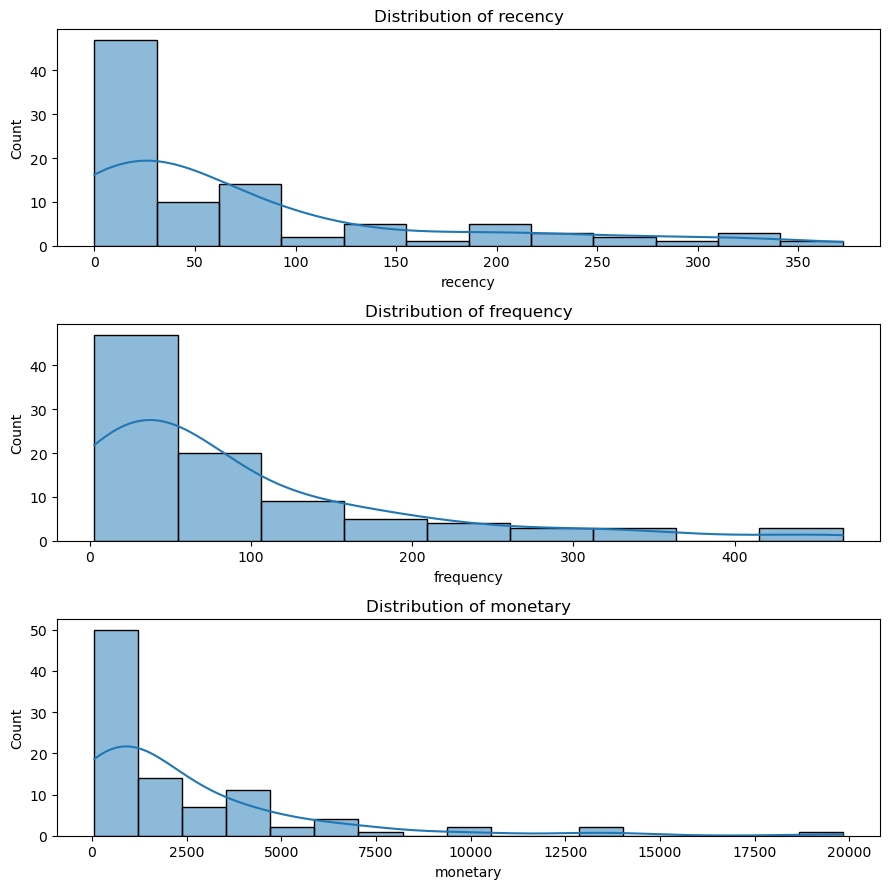

In [45]:
# Plot all 3 graphs together for summary findings


plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm_df,'recency')

plt.subplot(3, 1, 2)
check_skew(rfm_df,'frequency')

plt.subplot(3, 1, 3)
check_skew(rfm_df,'monetary')

plt.tight_layout()

Since the data is highly right skewed, we are going to apply log transformations to reduce the skewness



In [46]:
rfm_log_df = rfm_df.copy()

In [47]:
rfm_log_df.head(2)

,customerid,recency,frequency,monetary
0,12426.0,194,30,582.73
1,12427.0,21,31,825.80


In [48]:
rfm_log_df.isnull().any()

customerid    False
recency       False
frequency     False
monetary      False
dtype: bool

recency's: Skew: -0.5657334070642546, : SkewtestResult(statistic=-2.2598564705522692, pvalue=0.023830160274177337)
frequency's: Skew: 0.03412095411415033, : SkewtestResult(statistic=0.14419738301806456, pvalue=0.8853446073988928)
monetary's: Skew: 0.10694069008323207, : SkewtestResult(statistic=0.45101515917889456, pvalue=0.6519786233588798)


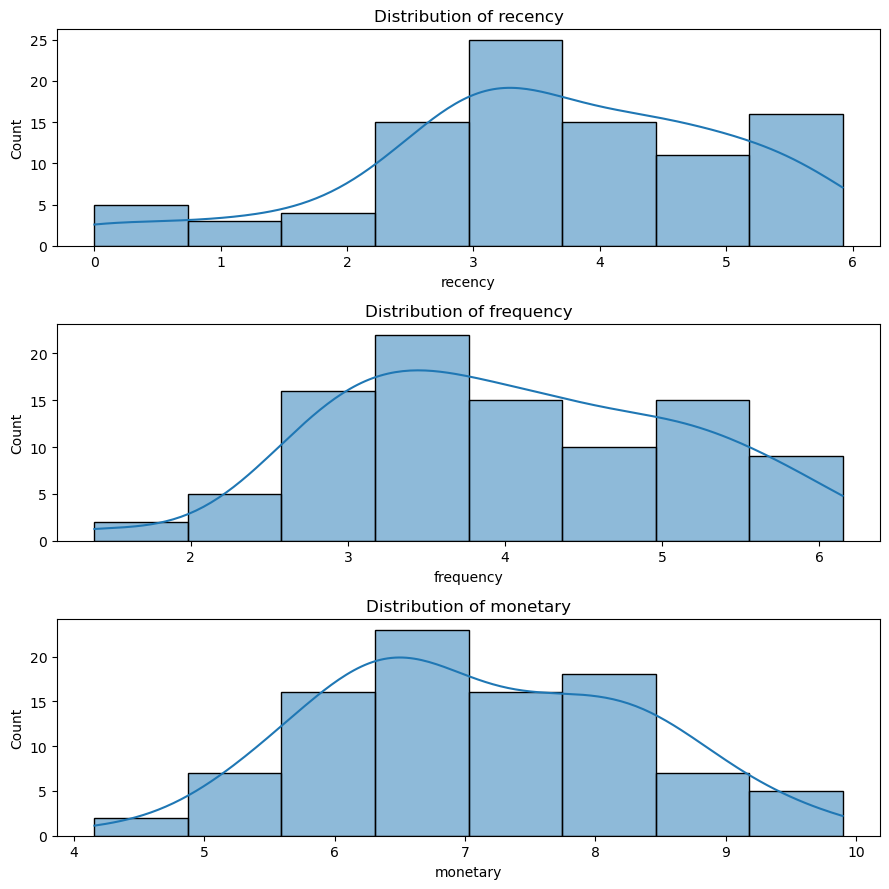

In [49]:
columns_to_log_transform = ['recency','frequency','monetary']

rfm_log_df[columns_to_log_transform] = np.log(rfm_log_df[columns_to_log_transform]+1)

#df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(rfm_log_df,'recency')

plt.subplot(3, 1, 2)
check_skew(rfm_log_df,'frequency')
plt.subplot(3, 1, 3)
check_skew(rfm_log_df,'monetary')

plt.tight_layout()

In [50]:
rfm_log_df.head(2)

,customerid,recency,frequency,monetary
0,12426.0,5.273000,3.433987,6.369439
1,12427.0,3.091042,3.465736,6.717563


In [51]:
from feature_engine.outliers import Winsorizer

windsoriser = Winsorizer(tail='both', # cap left, right or both tails 
                          fold=2,
                           variables=[ 'recency', 'frequency', 'monetary']
                        )
windsoriser.fit(rfm_log_df)

Winsorizer(fold=2, tail='both', variables=['recency', 'frequency', 'monetary'])

In [52]:
rfm_log_df = windsoriser.transform(rfm_log_df)

In [53]:
rfm_log_df.head(2)

,customerid,recency,frequency,monetary
0,12426.0,5.273000,3.433987,6.369439
1,12427.0,3.091042,3.465736,6.717563


In [116]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['recency','frequency','monetary']

scaler = StandardScaler()

scaler.fit(rfm_log_df[columns_to_scale])

RFM_Table_scaled = scaler.transform(rfm_log_df[columns_to_scale])

In [117]:
# Creating a new DataFrame with scaled values and original indices

RFM_Table_scaled_df1 = pd.DataFrame(RFM_Table_scaled, columns=columns_to_scale,index=rfm_log_df.index )


# # Create a new DataFrame with scaled values and original indices
# RFM_Table_scaled = pd.DataFrame(scaled_values, columns=columns_to_scale, index=rfm_log_df.index)

# 
# RFM_Table_scaled = pd.concat([RFM_Table_scaled, rfm_log_df.drop(columns=columns_to_scale)], axis=1)

# # Now RFM_Table_scaled will have all four columns
# RFM_Table_scaled.head()

In [118]:
# Joining the non-scaled columns to the scaled DataFrame

RFM_Table_scaled_df1= pd.concat([RFM_Table_scaled_df1, rfm_log_df.drop(columns=columns_to_scale)], axis=1)


In [119]:
RFM_Table_scaled_df1.head(2)

,recency,frequency,monetary,customerid
0,1.231203,-0.579543,-0.629393,12426.0
1,-0.395796,-0.549273,-0.333007,12427.0


In [60]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import math
from sklearn.metrics import silhouette_score

In [120]:
#Finding the optimal K with Elbow Method and Silhouette score

Sum_of_squared_distances = []
silhouette_avg = []

K = range(1,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(RFM_Table_scaled_df1)
    Sum_of_squared_distances.append(model.inertia_)

    if k>1:
        silhouette_avg.append(silhouette_score(RFM_Table_scaled_df1, model.labels_ ,metric='euclidean'))

    else:
        pass

# Finding the optimal number of clusters

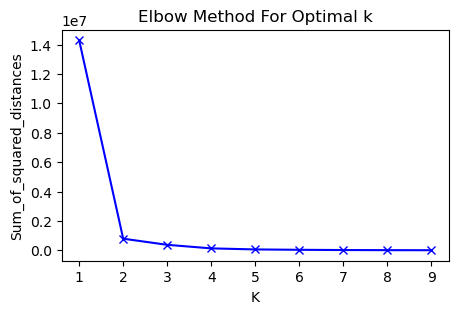

In [87]:
plt.figure(figsize=(5,3))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

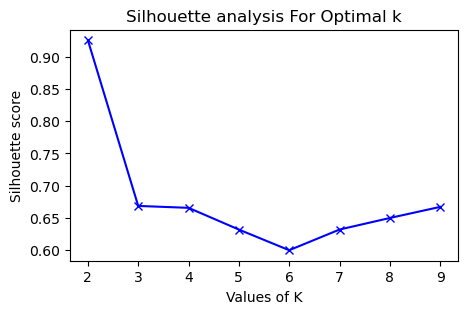

In [88]:
#Silhouette scores

plt.figure(figsize=(5,3))
plt.plot(K[1:],silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()


In [139]:
#lets take k =4 

final_model = KMeans(n_clusters=4, random_state=0)
final_model.fit(RFM_Table_scaled_df1)

KMeans(n_clusters=4, random_state=0)

In [140]:
# df_segm_kmeans= RFM_Table_scaled.copy()
df_scaled_data= RFM_Table_scaled_df1.copy()
RFM_Table_scaled_df1['labels'] = final_model.labels_

In [141]:
RFM_Table_scaled_df1.head

<bound method NDFrame.head of      recency  frequency  monetary  customerid  labels
0   1.231203  -0.579543 -0.629393     12426.0       2
1  -0.395796  -0.549273 -0.333007     12427.0       2
2   1.203944  -0.360661 -0.438390     12468.0       2
3  -1.881473   1.994145  2.037692     12471.0       2
4  -0.093457   1.703872  1.432058     12472.0       2
..       ...        ...       ...         ...     ...
89  0.679116   0.017736  0.218427     13814.0       1
90 -0.362650   1.081480  1.015199     13815.0       1
91 -0.330915  -0.643128 -0.645679     13816.0       1
92 -0.164526  -0.784636 -0.985992     13817.0       1
93 -0.588049   0.111591 -0.815234     14335.0       3

[94 rows x 5 columns]>

In [142]:
df_with_labels = RFM_Table_scaled_df1.copy()

In [143]:
df_with_labels.shape

(94, 5)

In [144]:
RFM_Table_scaled_df1.shape

(94, 5)

In [145]:
# inverse scaling 

df_with_labels[columns_to_scale] = scaler.inverse_transform(df_with_labels[columns_to_scale])

df_with_labels.head(2)

,recency,frequency,monetary,customerid,labels
0,5.273000,3.433987,6.369439,12426.0,2
1,3.091042,3.465736,6.717563,12427.0,2


In [146]:
#inverse log
df_with_labels[['recency', 'frequency', 'monetary']] = df_with_labels[['recency', 'frequency', 'monetary']].apply(lambda x: x - 1)

In [147]:
df_with_labels[['recency', 'frequency', 'monetary']] = df_with_labels[['recency', 'frequency', 'monetary']].apply(lambda x: np.exp(x))

In [148]:
df_with_labels.head(100)

,recency,frequency,monetary,customerid,labels
0,71.736491,11.404263,214.742266,12426.0,2
1,8.093348,11.772142,304.162722,12427.0,2
2,69.161335,14.347298,268.750647,12468.0,2
3,1.103638,169.592422,4925.086144,12471.0,2
4,12.140022,125.079010,2418.112034,12472.0,2
...,...,...,...,...,...
89,34.212788,21.337008,581.293663,13814.0,1
90,8.461227,65.114661,1481.950826,13815.0,1
91,8.829107,10.668504,210.673520,13816.0,1
92,11.036383,9.196986,141.258348,13817.0,1


In [149]:
cluster_analysis= df_with_labels.groupby(['labels']).mean()
cluster_analysis

,recency,frequency,monetary,customerid
labels,,,,
0,33.631991,34.558105,877.667548,12648.000000
1,21.428977,20.509279,496.108419,13813.500000
2,25.084200,40.655395,955.223703,12507.461538
3,6.253950,23.544284,172.631107,14335.000000
